In [1]:
import numpy as np

import pandas as pd

# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from matplotlib import pyplot


In [2]:
df = pd.read_excel("data1.xlsx",index_col=None)

In [3]:
df.head()

,Unnamed: 0,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,...,Att97,Att98,Att99,Att100,Att101,Att102,Att103,prob,Class1,Class2
0,0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,...,-0.038675,-0.039102,0.017429,-0.052659,-0.042402,0.118473,0.125632,0.90,0,0
1,1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,...,0.010430,-0.013809,-0.009248,-0.027318,-0.014191,0.022783,0.123785,0.90,0,0
2,2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,...,0.002233,-0.002072,-0.010981,0.007615,-0.063378,-0.084181,-0.034402,0.92,0,1
3,3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,...,-0.066604,-0.055773,-0.041941,0.051066,0.004976,0.193972,0.131866,0.95,0,0
4,4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,...,-0.073576,0.050630,0.084832,-0.019570,-0.021650,-0.068326,-0.091155,0.27,1,1


In [4]:
df = df.drop(columns=['Class1'],axis=1)

In [7]:
df

,Unnamed: 0,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,...,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103,prob,Class2
0,0,0.093700,0.139771,0.062774,0.007698,0.083873,-0.119156,0.073305,0.005510,0.027523,...,-0.034711,-0.038675,-0.039102,0.017429,-0.052659,-0.042402,0.118473,0.125632,0.90,0
1,1,-0.022711,-0.050504,-0.035691,-0.065434,-0.084316,-0.378560,0.038212,0.085770,0.182613,...,-0.021814,0.010430,-0.013809,-0.009248,-0.027318,-0.014191,0.022783,0.123785,0.90,0
2,2,-0.090407,0.021198,0.208712,0.102752,0.119315,0.041729,-0.021728,0.019603,-0.063853,...,0.012583,0.002233,-0.002072,-0.010981,0.007615,-0.063378,-0.084181,-0.034402,0.92,1
3,3,-0.085235,0.009540,-0.013228,0.094063,-0.013592,-0.030719,-0.116062,-0.131674,-0.165448,...,-0.046999,-0.066604,-0.055773,-0.041941,0.051066,0.004976,0.193972,0.131866,0.95,0
4,4,-0.088765,-0.026743,0.002075,-0.043819,-0.005465,0.004306,-0.055865,-0.071484,-0.159025,...,0.028468,-0.073576,0.050630,0.084832,-0.019570,-0.021650,-0.068326,-0.091155,0.27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,-0.119784,0.001259,-0.123645,-0.015513,-0.059683,0.091032,-0.043302,0.229219,-0.071498,...,-0.055593,-0.049642,0.018571,0.068742,-0.061001,-0.081132,-0.065844,0.001267,0.95,1
1496,1496,0.085327,0.058590,0.085268,-0.020897,0.068972,0.030125,0.078056,0.011346,0.052618,...,0.294987,-0.076379,-0.076293,-0.072451,-0.052258,-0.040026,0.342176,-0.169668,0.12,1
1497,1497,0.082526,-0.095571,-0.022019,-0.046793,-0.038360,0.041084,0.056509,0.011749,-0.029657,...,-0.064831,-0.068696,-0.068521,-0.039841,0.274575,-0.066957,0.260121,-0.125303,0.90,0
1498,1498,-0.130830,0.008868,-0.009457,-0.058930,-0.041224,0.042269,0.117717,0.037388,-0.085563,...,-0.012710,0.135359,0.213512,-0.107561,-0.081925,-0.122332,-0.022453,0.001953,0.74,0


0    855
1    645
Name: Class2, dtype: int64

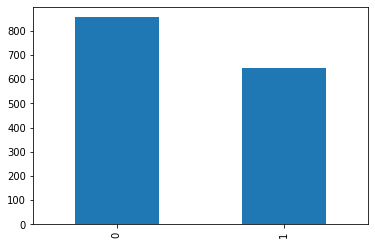

In [8]:
df['Class2'].value_counts().plot.bar()
df['Class2'].value_counts()

In [5]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'Class2')
# return best model
best = compare_models()

In [6]:
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.797900,0.863300,0.694000,0.808700,0.745300,0.579900
1,Gradient Boosting Classifier,0.787400,0.837400,0.700700,0.783500,0.738500,0.560600
2,Light Gradient Boosting Machine,0.780800,0.843800,0.669600,0.786600,0.720000,0.543000
3,K Neighbors Classifier,0.778800,0.836900,0.727200,0.753300,0.739200,0.547400
4,Extreme Gradient Boosting,0.777900,0.844200,0.680600,0.778100,0.723500,0.539700
5,Ridge Classifier,0.773100,0.000000,0.662900,0.775100,0.712200,0.527700
6,Extra Trees Classifier,0.773100,0.845700,0.649800,0.786200,0.710000,0.526800
7,Logistic Regression,0.765500,0.829900,0.642900,0.774300,0.699300,0.510700
8,Linear Discriminant Analysis,0.750200,0.815500,0.638500,0.744900,0.685100,0.480800
9,SVM - Linear Kernel,0.748300,0.000000,0.656300,0.735600,0.687200,0.479200
